Code for New York City

In [1]:
# import the csv for new york
import matplotlib.pyplot as plt
import pandas as pd
import datetime as datetime
from pyprojroot import here

In [2]:
df = pd.read_csv(here('data/db/original/world_air_quality_index/new-york, usa-air-quality.csv'), na_values=' ')
print(df)

           date   pm25    o3   no2   co
0      2020/5/2     15  34.0   5.0  1.0
1      2020/5/3     21  43.0   9.0  2.0
2      2020/5/4     36  36.0  12.0  1.0
3      2020/5/5     21  37.0  10.0  1.0
4      2020/5/6     16  32.0  17.0  1.0
...         ...    ...   ...   ...  ...
2304  2014/3/28     42   NaN   NaN  NaN
2305  2014/3/29     64   NaN   NaN  NaN
2306  2014/3/30     32   NaN   NaN  NaN
2307  2014/3/31     18   NaN   NaN  NaN
2308   2014/4/1     28   NaN   NaN  NaN

[2309 rows x 5 columns]


In [3]:
df.columns
print(df.columns)
newdf=df[['date', ' no2']]
newdf.head(10)

Index(['date', ' pm25', ' o3', ' no2', ' co'], dtype='object')


,date,no2
0,2020/5/2,5.0
1,2020/5/3,9.0
2,2020/5/4,12.0
3,2020/5/5,10.0
4,2020/5/6,17.0
5,2020/5/7,14.0
6,2020/5/8,8.0
7,2020/5/9,NaN
8,2020/4/2,6.0
9,2020/4/3,6.0


In [4]:
newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')

<ipython-input-4-2a6618479725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')


In [5]:
newdf=newdf.dropna()

In [6]:
newdf

,date,no2
0,2020-05-02,5.0
1,2020-05-03,9.0
2,2020-05-04,12.0
3,2020-05-05,10.0
4,2020-05-06,17.0
...,...,...
794,2018-01-30,14.0
795,2018-01-31,19.0
796,2018-02-01,28.0
797,2018-02-02,17.0


In [7]:
newdf = newdf.loc[newdf.date > '2019-09-01']


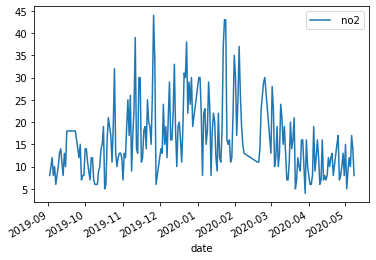

In [8]:
newdf.plot('date', ' no2')

In [9]:
newdf = newdf.sort_values('date')

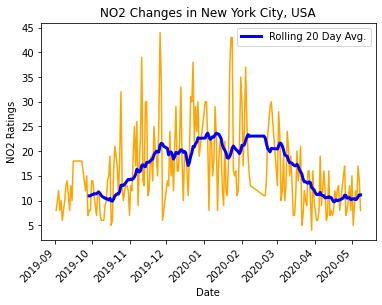

In [10]:
#make visualization
rolling_ave = 20
plt.plot(newdf['date'], newdf[' no2'],color='orange')
plt.plot(newdf['date'], newdf[' no2'].rolling(rolling_ave).mean(), 
         label='Rolling {} Day Avg.'.format(rolling_ave),color='blue', linewidth=3)
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('NO2 Ratings')
plt.title('NO2 Changes in New York City, USA')
plt.legend()
plt.show()

Code for Wuhan

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as datetime
from pyprojroot import here

In [12]:
df = pd.read_csv (here('data/db/original/world_air_quality_index/wuhan-air-quality.csv'), na_values = ' ')
print(df)

          date   pm25   pm10    o3   no2   so2    co
0     2020/5/2  150.0   67.0  59.0  23.0   4.0   9.0
1     2020/5/3  136.0   58.0  73.0  23.0   4.0   7.0
2     2020/5/4  112.0   72.0  65.0  35.0   6.0  14.0
3     2020/5/5  133.0   44.0  37.0   9.0   3.0  10.0
4     2020/5/6  130.0   52.0  34.0  16.0   6.0  16.0
...        ...    ...    ...   ...   ...   ...   ...
2190  2017/1/2    NaN  119.0  30.0  47.0   9.0  14.0
2191  2016/1/4    NaN  182.0  17.0  32.0  12.0  24.0
2192  2015/1/1    NaN  109.0  29.0  43.0  31.0  20.0
2193  2014/5/4    NaN   87.0  38.0  26.0  10.0   6.0
2194  2014/1/1    NaN  151.0  21.0  69.0  40.0  22.0

[2195 rows x 7 columns]


In [13]:
df.columns
print(df.columns)
newdf=df[['date', ' no2']]
newdf.head(10)

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')


,date,no2
0,2020/5/2,23.0
1,2020/5/3,23.0
2,2020/5/4,35.0
3,2020/5/5,9.0
4,2020/5/6,16.0
5,2020/5/7,17.0
6,2020/5/8,14.0
7,2020/5/9,NaN
8,2020/4/2,13.0
9,2020/4/3,15.0


In [14]:
newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')

<ipython-input-14-2a6618479725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')


In [15]:
newdf = newdf.dropna()

In [16]:
newdf

,date,no2
0,2020-05-02,23.0
1,2020-05-03,23.0
2,2020-05-04,35.0
3,2020-05-05,9.0
4,2020-05-06,16.0
...,...,...
2190,2017-01-02,47.0
2191,2016-01-04,32.0
2192,2015-01-01,43.0
2193,2014-05-04,26.0


In [17]:
newdf = newdf.loc[newdf.date > '2019-09-01']

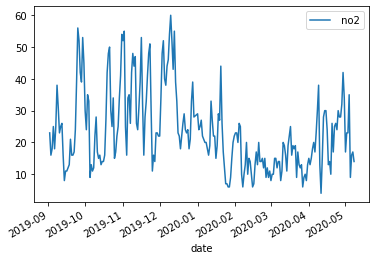

In [18]:
newdf.plot('date', ' no2')

In [19]:
newdf = newdf.sort_values('date')

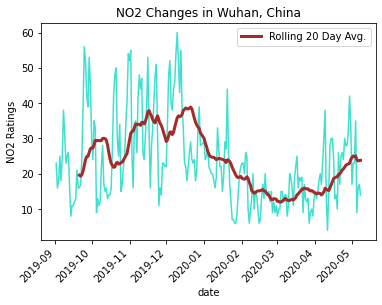

In [20]:
rolling_ave=20
plt.plot(newdf['date'], newdf[' no2'], color='turquoise')
plt.plot(newdf['date'], newdf[' no2'].rolling(rolling_ave).mean(), 
         label='Rolling {} Day Avg.'.format(rolling_ave), color='brown', linewidth=3)
plt.title('NO2 Changes in Wuhan, China')
plt.xlabel('date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('NO2 Ratings')
plt.legend()
plt.show()

Code for Milan

In [21]:
import matplotlib.pyplot as plt
import datetime as datetime
import pandas as pd
from pyprojroot import here

In [22]:
df = pd.read_csv (here('data\db\original\world_air_quality_index\milano-senato, lombardia, italy-air-quality.csv'), na_values = ' ') 
print(df)

            date   pm25   pm10   no2   co
0       2020/5/2   55.0   10.0  12.0  NaN
1       2020/5/3   25.0   10.0   9.0  NaN
2       2020/5/4   34.0   12.0  21.0  NaN
3       2020/5/5   38.0   18.0  24.0  NaN
4       2020/5/6   42.0   20.0  19.0  NaN
...          ...    ...    ...   ...  ...
1899  2014/11/27    NaN    NaN  30.0  NaN
1900  2014/11/28    NaN    NaN  33.0  NaN
1901  2014/11/29    NaN    NaN  38.0  NaN
1902  2014/11/30    NaN    NaN  31.0  NaN
1903   2014/12/1    NaN    NaN  36.0  NaN

[1904 rows x 5 columns]


In [23]:
df.columns
print(df.columns)
newdf=df[['date', ' no2']]
newdf.head(10)

Index(['date', ' pm25', ' pm10', ' no2', ' co'], dtype='object')


,date,no2
0,2020/5/2,12.0
1,2020/5/3,9.0
2,2020/5/4,21.0
3,2020/5/5,24.0
4,2020/5/6,19.0
5,2020/5/7,NaN
6,2020/4/2,29.0
7,2020/4/3,36.0
8,2020/4/4,30.0
9,2020/4/5,21.0


In [24]:
newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')

<ipython-input-24-2a6618479725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['date'] = pd.to_datetime(newdf['date'], format='%Y/%m/%d')


In [25]:
newdf=newdf.dropna()

In [26]:
newdf

,date,no2
0,2020-05-02,12.0
1,2020-05-03,9.0
2,2020-05-04,21.0
3,2020-05-05,24.0
4,2020-05-06,19.0
...,...,...
1899,2014-11-27,30.0
1900,2014-11-28,33.0
1901,2014-11-29,38.0
1902,2014-11-30,31.0


In [27]:
newdf = newdf.loc[newdf.date > '2019-09-01']

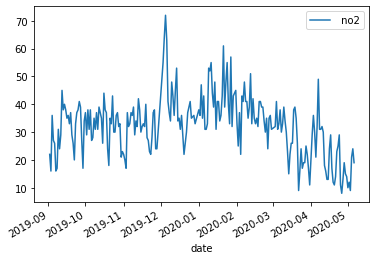

In [28]:
newdf.plot('date', ' no2')

In [29]:
newdf = newdf.sort_values('date')

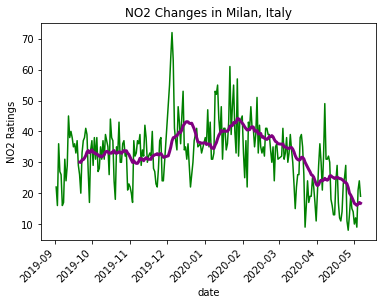

In [30]:
rolling_ave=20
plt.plot(newdf['date'], newdf[' no2'], color='green')
plt.plot(newdf['date'], newdf[' no2'].rolling(rolling_ave).mean(), 
         label='Rolling {} Day Avg.'.format(rolling_ave), color='purple', linewidth=3)
plt.title('NO2 Changes in Milan, Italy')
plt.xlabel('date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('NO2 Ratings')
plt.show()